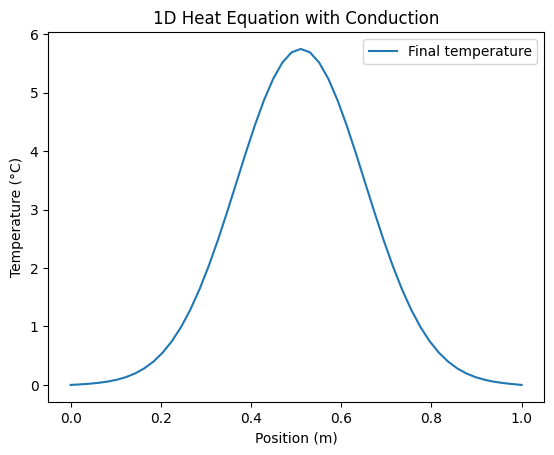

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0            # Length of the rod (m)
Nx = 50            # Number of spatial points
dx = L / (Nx - 1)  # Spatial step size (m)
alpha = 0.01       # Thermal diffusivity (m^2/s)
dt = 0.01        # Time step size (s)
T_total = 1      # Total simulation time (s)
Nt = int(T_total / dt)  # Number of time steps

# Initial and boundary conditions
u = np.zeros(Nx)               # Temperature distribution (initial condition)
u[Nx // 2] = 100              # Initial heat source at the center
u_new = np.zeros_like(u)       # Placeholder for the updated temperature

# Stability condition (optional check)
cfl = alpha * dt / dx**2
if cfl > 0.5:
    raise ValueError("The scheme is unstable! Reduce dt or increase dx.")

# Time-stepping loop
for n in range(Nt):
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + alpha * dt / dx**2 * (u[i+1] - 2*u[i] + u[i-1])

    # Update the temperature profile
    u[:] = u_new[:]

# Plot the final temperature distribution
x = np.linspace(0, L, Nx)
plt.plot(x, u, label="Final temperature")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.title("1D Heat Equation with Conduction")
plt.legend()
plt.show()
